[융합프로젝트]G팀 - 최종보고서

# **효율적인 분리수거 및 재활용을 위한 이미지 기반 쓰레기 유형 분류**

## **¶　기획 배경**

- 동일한 재질의 쓰레기도 상태에 따라 분류되는 쓰레기 유형의 차이가 있으며, 이로 인해 사람들이 정확한 분리배출에 어려움을 겪음

- 분리배출된 쓰레기는 수거되어 선별업체를 통해서 선별, 폐기처리 과정을 거치는데 선별공정에서의 보다 빠르고 정확한 분류 필요

## **¶　프로젝트 목표**
- 시민들의 정확한 분리배출 및 재활용 쓰레기와 생활쓰레기의 혼합 최소화를 위한 쓰레기 이미지 분류 최적 모델 구축

## 프로젝트 진행 방법 및 과정

## **¶　데이터 소개**
Kaggle에서 제공하는 ['Garbage Classification'](https://www.kaggle.com/asdasdasasdas/garbage-classification) data set 사용


> 데이터 구성<br/>
>
>+ Garbage Classification Data (jpg file) : 6가지의 쓰레기 유형에 따라 라벨링 되어있는 이미지 데이터
>
>|      |6 classifications (num of data)|        |
>|:------:|:--------:|:------:|
|cardboard (393) | glass(491)|metal(400)|
|paper (584) | trash (127) | plastic (472) |<br/><br/><br/><br/>
>
>
> + one-indexed-files<br/>
> + one-indexed-files-notrash_(train, validation, test)<br/>

<br/>

 > 데이터 샘플
>
>
>*   cardboard1.jpg<br/>
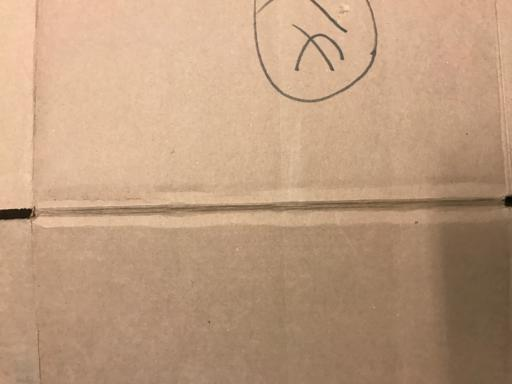
<br/>
>*   glass.jpg<br/>
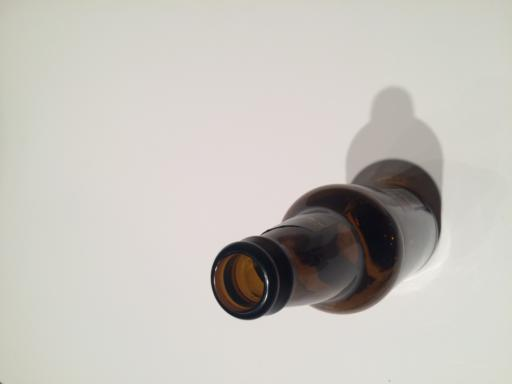



## **¶　방법론**

*   모델 최적화
 - 데이터 전처리<br/>
　- RGB, Grey scale 이미지 데이터 처리 방법 비교<br/>
　　이미지 데이터를 픽셀로 전환할 때 각 셀의 색을 표현하는 방식<br/>
　　=RGB : 3가지 색 명도(빨강, 초록, 파랑)가 합쳐진 벡터 형태<br/>
　　=Grey scale : 모든 색이 흑백, 각 셀은 명도를 나타내는 수로 표현<br/>
　　=>두 가지 색 표현 방법 결과 비교 및 방법론 선택<br/><br/>
　- 데이터 확장(Data augumentation)<br/>
　　기존 데이터에서 약간 수정된 사본 또는 기존 데이터에서 새로 생성된 합성 데이터를 추가하여 데이터 양을 늘리는 방법<br/>
　　정규화 역할을 하며 기계학습 모델을 학습할 때 과적합을 줄이는 역할<br/><br/>
　- class 가중치 산정<br/>
　　데이터가 class별로 불균형 할 때 학습을 위해 사용되며, 학습시 우리가 원하는 타겟에 대해 맞추지 못할 경우 가중치 부여 가능<br/>
　　소수의 class에 관심이 없다면 class의 균형을 맞출 필요가 없으나, 쓰레기의 종류별 분류에서의 각 class 학습 중요<br/><br/>
 - 전이학습<br/>
　- 학습 데이터 수가 많은 모델의 일부를 해결하고자 하는 과제에 맞게 재보정하여 사용<br/>
　- 수가 적은 Garbage 데이터를 전이학습을 통해 학습시 적용시 더 좋은 성능의 모델 구축 가능<br/><br/>
*  다양한 이미지 데이터에서 모델 성능 평가<br/><br/>
　- 무료 이미지 제공 사이트 [Unsplash](https://unsplash.com/)와 Google 이미지 검색을 통해 cardboard, glass, metal, paper, plastic, trash 각 class별 5개의 이미지<br/>　　 데이터 구성   <br/>
　-기존의 데이터 보다 분석이 복잡한 이미지 데이터로 구성하여 선정한 모델의 이용 가능성 평가<br/>

> 비교모델(설명추가)<br/>
>* KNN(K-Nearest Neighbor)<br/>
　-어떤 데이터가 주어지면 그 주변(이웃)의 데이터를 살펴본 뒤 더 많은 데이터가 포함되어 있는 범주로 분류<br/>
　-적절한 k값 산정이 중요<br/><br/>
>* MLP(Multi-Layer Perceptron)<br/>
　-퍼셉트론으로 이루어진 층(layer) 여러 개를 순차적으로 붙인 형태<br/>
　-입력 계층과 출력 계층 사이에 지시된 그래프로 연결된 여러 입력 노드의 계층을 갖는 구조<br/><br/>
>* CNN<br/>
　-이미지를 분할하여 각각의 분할된 영역에 집중하여 학습 진행하는 Convolution과 인공신경망 구조가 결합된 모델
<br/><br/>
>*VGG16<br/>
　-합성곱 계층과 풀링 계층으로 구성되는 기본적인 CNN에서 합성곱 계층, 완전 연결 계층 모두 16층으로 심화한 모델
<br/><br/>
>*ResNet<br/>
　-층이 깊어지면 성능이 떨어질 수 있는 문제를 skip connection으로 해결하여 CNN의 층을 더 깊게하며 깊이에 비례한 성능 <br/> 　향상이 가능한 모델
<br/><br/>
> 평가지표<br/>
　　Accuracy<br/>
　　= 　(올바르게 예측한 샘플) ÷ (개수 전체 샘플 개수)

-----------------------

# **[모델학습]**

------------------------

## KNN

### »데이터 구성

#### opencv를 사용하여 이미지를 재조정한 한 후 모델링

In [ ]:
def image_to_feature_vector(image, size=(256, 360)):
	return cv2.resize(image, size).flatten()

In [ ]:
#@title
file_list = os.listdir('/content/drive/MyDrive/Garbage classification/Garbage classification/cardboard')

for i in file_list:
    cardboard_img_dir = "/content/drive/MyDrive/Garbage classification/Garbage classification/cardboard/{0}".format(i)
    img = cv2.imread(cardboard_img_dir)
    pixels = image_to_feature_vector(img)
    img_list.append(pixels)
    img_label.append(0)

In [ ]:
#@title
file_list = os.listdir('/content/drive/MyDrive/Garbage classification/Garbage classification/glass')

for i in file_list:
    cardboard_img_dir = "/content/drive/MyDrive/Garbage classification/Garbage classification/cardboard/{0}".format(i)
    img = cv2.imread(cardboard_img_dir)
    pixels = image_to_feature_vector(img)
    img_list.append(pixels)
    img_label.append(1)

In [ ]:
#@title
file_list = os.listdir('/content/drive/MyDrive/Garbage classification/Garbage classification/metal')

for i in file_list:
    cardboard_img_dir = "/content/drive/MyDrive/Garbage classification/Garbage classification/metal/{0}".format(i)
    img = cv2.imread(cardboard_img_dir)
    pixels = image_to_feature_vector(img)
    img_list.append(pixels)
    img_label.append(2)


In [ ]:
#@title
file_list = os.listdir('/content/drive/MyDrive/Garbage classification/Garbage classification/paper')

for i in file_list:
    cardboard_img_dir = "/content/drive/MyDrive/Garbage classification/Garbage classification/paper/{0}".format(i)
    img = cv2.imread(cardboard_img_dir)
    pixels = image_to_feature_vector(img)
    img_list.append(pixels)
    img_label.append(3)

In [ ]:
#@title
file_list = os.listdir('/content/drive/MyDrive/Garbage classification/Garbage classification/plastic')

for i in file_list:
    cardboard_img_dir = "/content/drive/MyDrive/Garbage classification/Garbage classification/plastic/{0}".format(i)
    img = cv2.imread(cardboard_img_dir)
    pixels = image_to_feature_vector(img)
    img_list.append(pixels)
    img_label.append(4)

In [ ]:
#@title
file_list = os.listdir('/content/drive/MyDrive/Garbage classification/Garbage classification/trash')

for i in file_list:
    cardboard_img_dir = "/content/drive/MyDrive/Garbage classification/Garbage classification/trash/{0}".format(i)
    img = cv2.imread(cardboard_img_dir)
    pixels = image_to_feature_vector(img)
    img_list.append(pixels)
    img_label.append(5)

### » KNN 모델 구축
　　k = 5로 설정하고 모델링

　　Test, train 을 8:2로 분할


In [ ]:
(train_img, test_img, train_label, test_label) = train_test_split(
    img_list, img_label, test_size = 0.2, random_state = 42)

In [ ]:
model = KNeighborsClassifier(n_neighbors=5 )
model.fit(train_img, train_label)
acc = model.score(test_img,test_label)
print("Accuracy: {:.2f}%".format(acc *100))


Accuracy: 46.25%


**KNN Accuracy(k = 5) : 46.25%**






#### 교차검증을 통한 최적의 K값 선택

In [ ]:
k_range = range(1,13)
k_score = []

for k in k_range :
    knn = KNeighborsClassifier(k)
    scores = cross_val_score(knn,train_img, train_label, cv=5,scoring="accuracy")
    k_score.append(scores.mean())

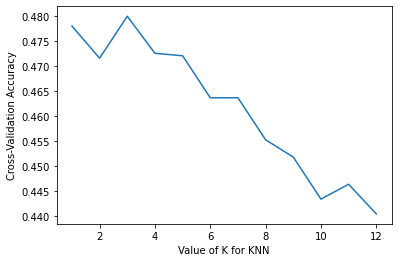

In [ ]:
plt.plot(k_range, k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

### »평가지표 산정

최적의 k : 3

**KNN Accuracy(k=3) : 0.48**

--------------------------

## MLP




### »데이터 구성
　　MLP 모델 적용 전 색상 이미지(RGB)와 회색 이미지(Grey)에 따른 성능 비교를 위해 이미지 데이터를 두 종류로 불러옴<br/>
　　각 이미지 데이터에 쓰레기 종류 라벨 부여

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import random
import pathlib
import glob
import math

all_images = pathlib.Path("/content/drive/MyDrive/Garbage classification/Garbage classification")
all_images = list(all_images.glob('*/*.jpg'))
all_images = [str(path) for path in all_images]
random.shuffle(all_images) #shuffle the images

N=len(all_images)
N_category=[393,491,400,584,472,127]

frac=4/5   #fraction of data for training
N1 = math.floor(N*frac)
N2 = N-N1
train_images = all_images[:N1]
test_images = all_images[N1+1:]

In [ ]:
print(N2)

506


In [ ]:
data_dir=pathlib.Path("/content/gdrive/My Drive/Colab Notebooks/Garbage/")
label_names = sorted(item.name for item in data_dir.glob('*/') if item.is_dir()) #sorted label names
label_to_index = dict((name, index) for index,name in enumerate(label_names))  #assign 0~5 to the labels

print(label_to_index)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [ ]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_images]
train_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in train_images]
test_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in test_images]

RGB, Grey scale 이미지 데이터 구축

In [ ]:
#PIL-Python Imaging Library
import PIL.Image  #resize images
def GreyPicture(image,width):
    img = PIL.Image.open(image).convert('LA') #convert to greyscale
    basewidth = width
    wpercent = (basewidth/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    return img.resize((basewidth,hsize), PIL.Image.ANTIALIAS)

def RGBPicture(image,width):
    img = PIL.Image.open(image)
    basewidth = width
    wpercent = (basewidth/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    return img.resize((basewidth,hsize), PIL.Image.ANTIALIAS)

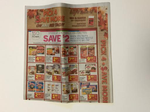

(150, 112) RGB


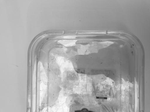

(150, 112) LA


In [ ]:
#Sample
img_1=RGBPicture(train_images[0],150)
display(img_1)
print(img_1.size,img_1.mode)

img_2=GreyPicture(train_images[1],150)
display(img_2)
print(img_2.size,img_2.mode)

 train, test 형식 통일

In [ ]:
#images to single matrix
Grey_train_matrix=[]
for img in train_images:
    matrix= np.asarray(GreyPicture(img,width=150))
    image_arr = np.ndarray.flatten(matrix)
    Grey_train_matrix.append(image_arr)

In [ ]:
Grey_test_matrix=[]
for img in test_images:
    matrix= np.asarray(GreyPicture(img,width=150))
    image_arr = np.ndarray.flatten(matrix)
    Grey_test_matrix.append(image_arr)

In [ ]:
RGB_train_matrix=[]
for img in train_images:
    matrix= np.asarray(RGBPicture(img,width=150))
    image_arr = np.ndarray.flatten(matrix)
    RGB_train_matrix.append(image_arr)

In [ ]:
RGB_test_matrix=[]
for img in test_images:
    matrix= np.asarray(RGBPicture(img,width=150))
    image_arr = np.ndarray.flatten(matrix)
    RGB_test_matrix.append(image_arr)

#### Naive Bayes Model을 통한 데이터 종류 선정
　　RGB 이미지와 Grey 이미지 데이터의 정확도 비교

In [ ]:
#Naive Bayes Model(generative)

#sklearn MultinomialNB
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [ ]:
#train accuracy
clf.fit(np.asarray(RGB_train_matrix), train_image_labels)
res_rgb=clf.predict(RGB_train_matrix)
clf.fit(np.asarray(Grey_train_matrix), train_image_labels)
res_grey=clf.predict(Grey_train_matrix)
size=len(train_image_labels)
count_rgb = 0
count_grey = 0
for i in range(size):
    if res_rgb[i] == train_image_labels[i]:
        count_rgb += 1
    if res_grey[i] == train_image_labels[i]:
        count_grey += 1
print("RGB train accuracy is {}".format(count_rgb/size))
print("Grey train accuracy is {}".format(count_grey/size))

RGB train accuracy is 0.4285007422068283
Grey train accuracy is 0.3334982681840673


In [ ]:
#test accuracy
clf.fit(np.asarray(RGB_train_matrix), train_image_labels)
res_rgb=clf.predict(RGB_test_matrix)
clf.fit(np.asarray(Grey_train_matrix), train_image_labels)
res_grey=clf.predict(Grey_test_matrix)
size=len(test_image_labels)
count_rgb = 0
count_grey = 0
for i in range(size):
    if res_rgb[i] == test_image_labels[i]:
        count_rgb += 1
    if res_grey[i] == test_image_labels[i]:
        count_grey += 1
print("RGB test accuracy is {}".format(count_rgb/size))
print("Grey test accuracy is {}".format(count_grey/size))

RGB test accuracy is 0.41188118811881186
Grey test accuracy is 0.31485148514851485


=> RGB 이미지 데이터의 Accuracy가 더 높음

### »MLP 모델 구축

In [ ]:
#Multilayer Perceptron Neural Network
import tensorflow as tf

In [ ]:
#standardization
RGB_train_matrix = np.asarray(RGB_train_matrix)/255

In [ ]:
#encoder
train_labels = np.zeros((N1,6));
for i in range(N1):
    train_labels[i,train_image_labels[i]] = 1;

In [ ]:
multilayer_perceptron = tf.keras.Sequential(
                            [tf.keras.layers.Dense(64, input_shape = (50400,), activation = 'relu'),
                             tf.keras.layers.Dense(64,  activation = 'relu'),
                             tf.keras.layers.Dense(32,  activation = 'relu'),
                            tf.keras.layers.Dense(6, activation = 'softmax')])
multilayer_perceptron.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3225664   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 198       
Total params: 3,232,102
Trainable params: 3,232,102
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#optm = tf.keras.optimizers.SGD(lr=0.001)
multilayer_perceptron.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

multilayer_perceptron.fit(RGB_train_matrix, train_labels, batch_size = 100, shuffle = True, epochs = 100)

Epoch 1/100
21/21 [==============================] - 1s 12ms/step - loss: 7.1039 - accuracy: 0.1682
Epoch 2/100
21/21 [==============================] - 0s 11ms/step - loss: 1.8322 - accuracy: 0.2256
Epoch 3/100
21/21 [==============================] - 0s 11ms/step - loss: 1.8412 - accuracy: 0.2806
Epoch 4/100
21/21 [==============================] - 0s 12ms/step - loss: 1.8579 - accuracy: 0.2514
Epoch 5/100
21/21 [==============================] - 0s 12ms/step - loss: 1.6954 - accuracy: 0.2984
Epoch 6/100
21/21 [==============================] - 0s 11ms/step - loss: 1.6366 - accuracy: 0.3201
Epoch 7/100
21/21 [==============================] - 0s 11ms/step - loss: 1.6220 - accuracy: 0.3295
Epoch 8/100
21/21 [==============================] - 0s 11ms/step - loss: 1.5819 - accuracy: 0.3617
Epoch 9/100
21/21 [==============================] - 0s 11ms/step - loss: 1.5110 - accuracy: 0.3963
Epoch 10/100
21/21 [==============================] - 0s 12ms/step - loss: 1.5204 - accuracy: 0.3751

In [ ]:
#prediction for test set
pred = multilayer_perceptron.predict(np.asarray(RGB_test_matrix))
prediction = np.asarray(tf.argmax(pred, 1));

### »평가지표 **산정**

In [ ]:
#accuracy
count_correct = 0;
for i in range(N2-1):
    if prediction[i] == test_image_labels[i]:
        #print(prediction[i], test_image_labels[i])
        count_correct += 1;
acc = count_correct/N2
print("Accuracy is {}".format(acc))

Accuracy is 0.4881422924901186


**MLP accuracy : 0.4881**

#### Random search를 통한 Hyperparamter 조정

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier, MLPRegressor
import joblib
import warnings
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [1024, 512, 256, 128, 64, 32],
    'activation' : ['relu','tanh','logistic'],
    'learning_rate' : ['constant','invscaling','adaptive']
}

cv = RandomizedSearchCV(mlp, parameters, cv=3)
cv.fit(RGB_train_matrix, train_labels)

print_results(cv)

BEST PARAM: {'learning_rate': 'adaptive', 'hidden_layer_sizes': 512, 'activation': 'relu'}

0.0 (+/-0.0) for {'learning_rate': 'invscaling', 'hidden_layer_sizes': 64, 'activation': 'tanh'}
0.172 (+/-0.133) for {'learning_rate': 'invscaling', 'hidden_layer_sizes': 128, 'activation': 'relu'}
0.233 (+/-0.06) for {'learning_rate': 'adaptive', 'hidden_layer_sizes': 512, 'activation': 'relu'}
0.0 (+/-0.0) for {'learning_rate': 'adaptive', 'hidden_layer_sizes': 1024, 'activation': 'tanh'}
0.0 (+/-0.0) for {'learning_rate': 'adaptive', 'hidden_layer_sizes': 128, 'activation': 'logistic'}
0.0 (+/-0.0) for {'learning_rate': 'adaptive', 'hidden_layer_sizes': 512, 'activation': 'logistic'}
0.0 (+/-0.0) for {'learning_rate': 'constant', 'hidden_layer_sizes': 512, 'activation': 'tanh'}
0.057 (+/-0.075) for {'learning_rate': 'adaptive', 'hidden_layer_sizes': 256, 'activation': 'relu'}
0.165 (+/-0.125) for {'learning_rate': 'constant', 'hidden_layer_sizes': 512, 'activation': 'relu'}
0.0 (+/-0.0) for 

In [ ]:
cv.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=512, learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=128, learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [ ]:
mlp.fit(RGB_train_matrix, train_labels)
y_pred = mlp.predict(RGB_test_matrix)

In [ ]:
prediction = np.asarray(tf.argmax(y_pred, 1))

#accuracy
count_correct = 0;
for i in range(N2-1):
    if prediction[i] == test_image_labels[i]:
        #print(prediction[i], test_image_labels[i])
        count_correct += 1;
acc = count_correct/N2
print("Accuracy is {}".format(acc))

Accuracy is 0.3181818181818182


MLP Accuracy(hyperparameter tuning by random search) : 0.3182<br/>
　-> Hyperparameter 조정 전 모델보다 성능이 좋지 못함

-------------------------

## CNN
　　CNN구현 및 class weight 산정을 통한 모델 최적화


　　class weight를 계산하여 모델에 적합 시켰으며, validation date의 loss 값을 기준으로 과적합이 발생하지 않는 최적의 모델 선택


### »데이터 구성

In [ ]:
INPUT = '/content/gdrive/My Drive/Colab Notebooks/Garbage classification/'
GLASS = INPUT + 'glass/'
PAPER = INPUT + 'paper/'
CARDBOARD = INPUT + 'cardboard/'
PLASTIC = INPUT + 'plastic/'
METAL = INPUT + 'metal/'
TRASH = INPUT + 'trash/'
MATERIALS = [GLASS,
             PAPER,
             CARDBOARD,
             PLASTIC,
             METAL,
             TRASH]

In [ ]:
def load_csv(subset):

    if subset == 'train':
        fname = INPUT + 'train_list.csv'
    elif subset == 'validation':
        fname = INPUT + 'vali_list.csv'
    elif subset == 'test':
        fname = INPUT + 'test_list.csv'
    else:
        raise ValueError('subset must be "train", "validation" or "test"')

    df = pd.read_csv(fname)


    # change the labels to be from 0 to 5'
    df['label'] -= 1

    # create path column
    df['folder'] = [MATERIALS[i] for i in df['label']]
    df['path'] = df['folder'] + df['file']

    # change type of label for datagenerator
    df['label_str'] = df['label'].astype(str)

    return df

In [ ]:
# Read all the csv files
df_train = load_csv('train')
df_valid = load_csv('validation')
df_test = load_csv('test')

df_train.head()

In [ ]:
IMG_SIZE = 299
classes = ['glass', 'paper', 'cardboard', 'plastic', 'metal', 'trash']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [16, 16]

from sklearn.metrics import confusion_matrix, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.layers as L
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input

#### Data augumentation


In [ ]:
# for the train set
datagen_aug = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.1,
    zoom_range=0.2,
    preprocessing_function=preprocess_input,
    rotation_range=90)

train_datagen = datagen_aug.flow_from_dataframe(
    df_train,
    x_col='path',
    y_col='label_str',
    class_mode='sparse',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    shuffle=True)

# for the validation and test sets
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

valid_datagen = datagen.flow_from_dataframe(
    df_valid,
    x_col='path',
    y_col='label_str',
    class_mode='sparse',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    shuffle=False)

test_datagen = datagen.flow_from_dataframe(
    df_test,
    x_col='path',
    y_col='label_str',
    class_mode='sparse',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    shuffle=False)

#### 데이터 class별 가중치 산정
　　class별 데이터 수의 불균형을 고려하기 위해 class weight 부여<br/>
　　데이터 수가 적은 class를 학습할 때 타 class에 비해 더 많은 가중치를 두고 훈련

Text(0, 0.5, 'population')

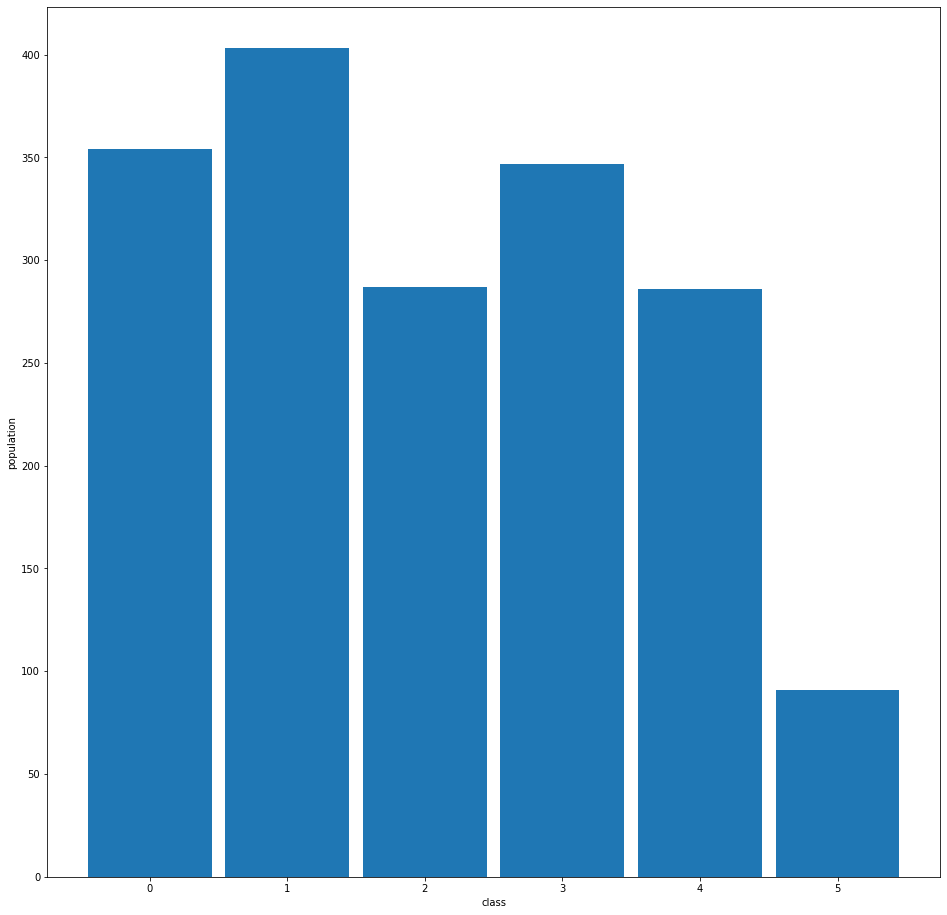

In [ ]:
plt.hist(df_train['label'], bins=np.arange(7)-0.5, rwidth=0.9)
plt.xlabel('class')
plt.ylabel('population')

Text(0, 0.5, 'Class weight')

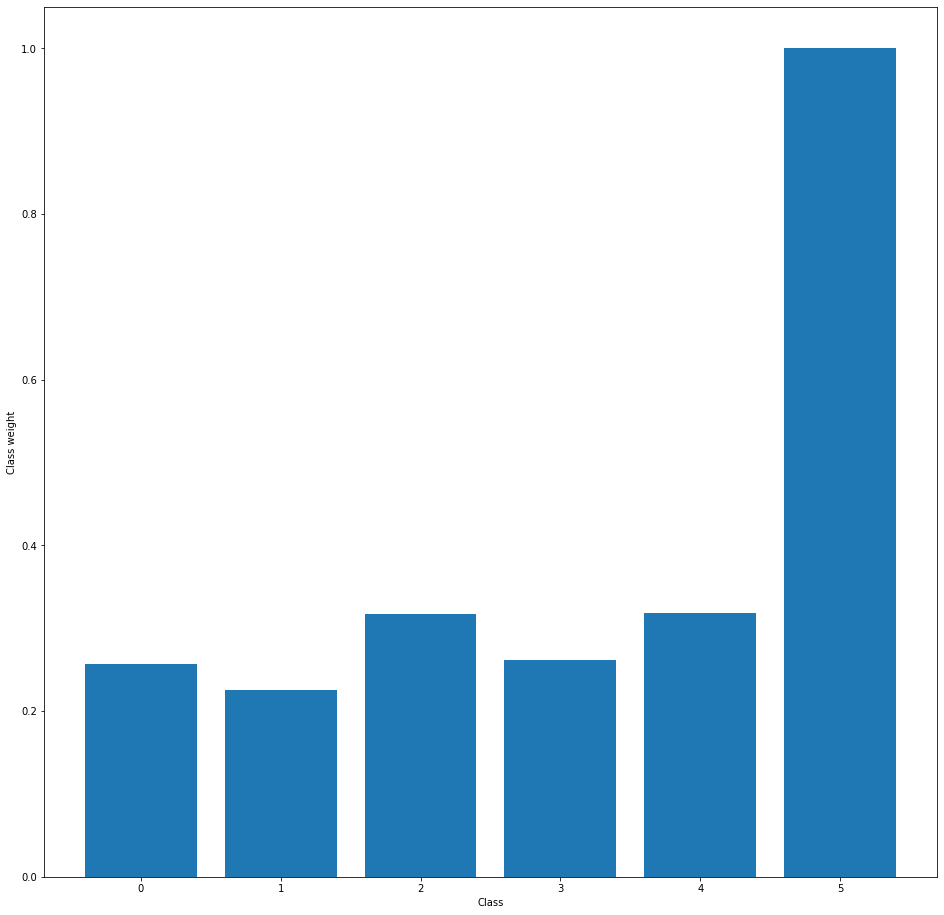

In [ ]:
hist, _ = np.histogram(df_train['label'], bins=np.arange(7)-0.5)
class_weight = hist.min()/hist
class_weight = {i:class_weight[i] for i in range(6)}

plt.bar(np.arange(6), [class_weight[i] for i in range(6)])
plt.xlabel('Class')0
plt.ylabel('Class weight')

### »CNN 모델 구축
　　너무 많은 Epoch에 의한 과적합 방지, 너무 적은 Epoch에 의한 과소적합 방지를 위해 Early stopping 사용<br/>
　　Validation data 학습 시 모델의 loss를 모니터링 기준으로 설정

In [ ]:
def cnn_model():

    X_input = L.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    # load pretrained model and freeze the weights
    pretrained = Xception(include_top=False, weights='imagenet')
    pretrained.trainable = False
    X = pretrained(X_input, training=False)

    # last layers
    X = L.GlobalAveragePooling2D()(X)
    X = L.Dense(1024, activation='relu')(X)
    X = L.Dense(512, activation='relu')(X)
    X = L.Dense(6, activation='softmax')(X)

    # create model
    model = Model(inputs=X_input, outputs=X)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])

    return model

In [ ]:
callbacks = [EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True)]

history = model.fit(
    train_datagen,
    epochs=100,
    class_weight=class_weight,
    callbacks=callbacks,
    validation_data=valid_datagen)

In [ ]:
model = cnn_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, None, None, 2048)  20861480  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 3078      
Total params: 23,487,534
Trainable params: 2,626,054
Non-trainable params: 20,861,480
_________________________________________

In [ ]:
callbacks = [EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True)]

history = model.fit(
    train_datagen,
    epochs=100,
    class_weight=class_weight,
    callbacks=callbacks,
    validation_data=valid_datagen)

Epoch 1/100
56/56 [==============================] - 1304s 23s/step - loss: 0.2592 - acc: 0.7223 - val_loss: 0.5908 - val_acc: 0.7774
Epoch 2/100
56/56 [==============================] - 57s 1s/step - loss: 0.1644 - acc: 0.8247 - val_loss: 0.4993 - val_acc: 0.8262
Epoch 3/100
56/56 [==============================] - 58s 1s/step - loss: 0.1358 - acc: 0.8377 - val_loss: 0.3316 - val_acc: 0.8811
Epoch 4/100
56/56 [==============================] - 59s 1s/step - loss: 0.1044 - acc: 0.8688 - val_loss: 0.2908 - val_acc: 0.8963
Epoch 5/100
56/56 [==============================] - 59s 1s/step - loss: 0.0933 - acc: 0.8897 - val_loss: 0.3084 - val_acc: 0.8963
Epoch 6/100
56/56 [==============================] - 58s 1s/step - loss: 0.0770 - acc: 0.9067 - val_loss: 0.2819 - val_acc: 0.9024
Epoch 7/100
56/56 [==============================] - 59s 1s/step - loss: 0.0725 - acc: 0.9095 - val_loss: 0.2951 - val_acc: 0.8963
Epoch 8/100
56/56 [==============================] - 59s 1s/step - loss: 0.0580 

#### 모델의 과적합 및 과소적합 여부 확인

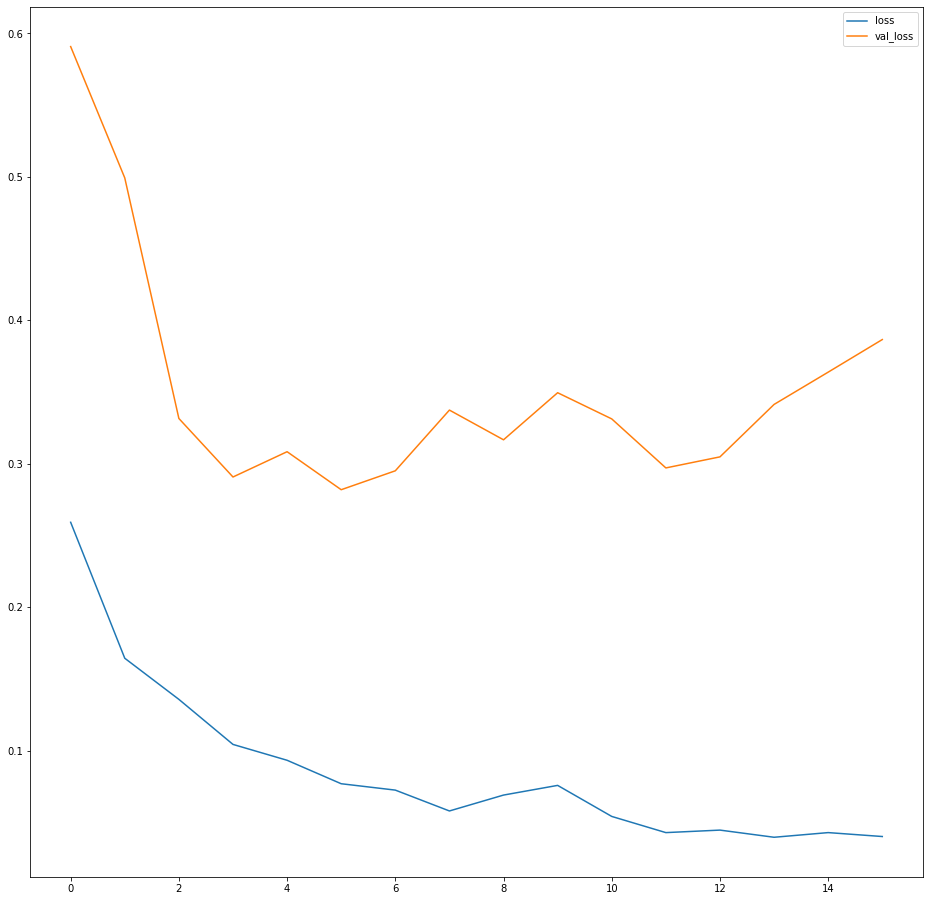

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

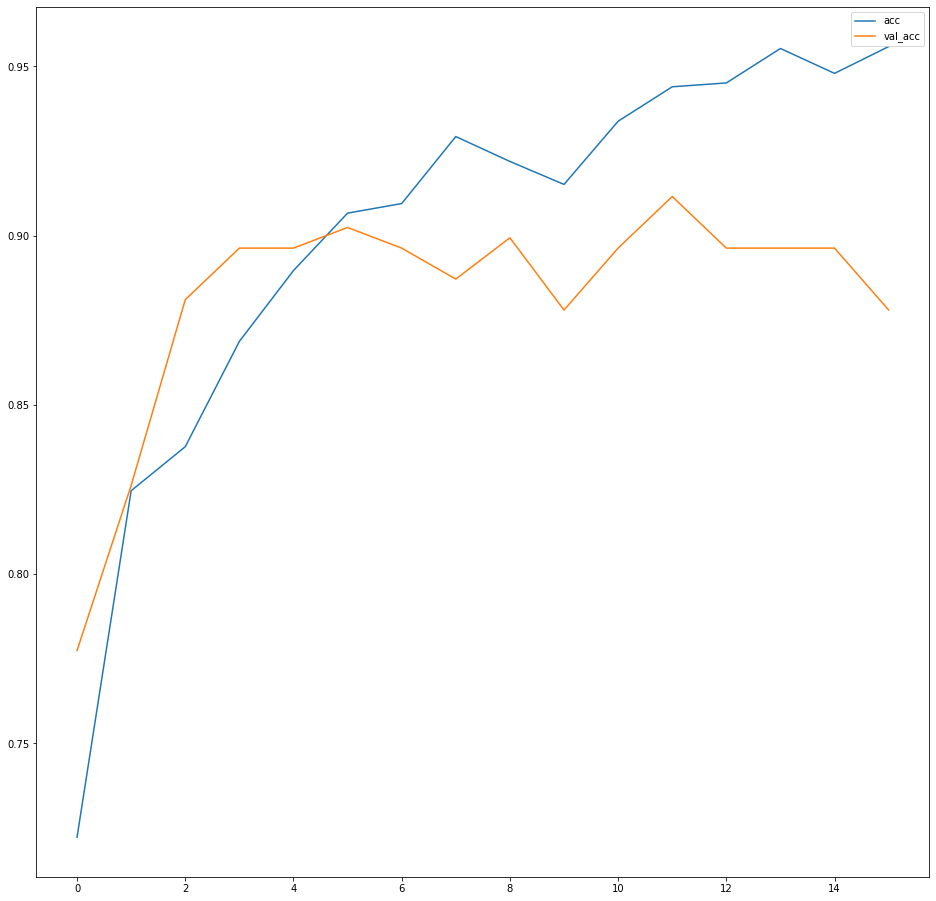

In [ ]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend()

In [ ]:
def plot_cm(y_true, y_pred, title, classes):
    '''
    Fancy confusion matrix plot.
    '''
    y_pred = y_pred.astype(int)

    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100

    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape

    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)

    cm = pd.DataFrame(cm, index=classes, columns=classes)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'

    fig, ax = plt.subplots()
    plt.title(title)
    sns.heatmap(cm, cmap='viridis', annot=annot, fmt='', ax=ax)

### »평가지표 산정

In [ ]:
pred_valid = np.argmax(model.predict(valid_datagen), axis=1)
pred_test = np.argmax(model.predict(test_datagen), axis=1)

score_valid = f1_score(df_valid['label'], pred_valid, average='macro')
score_test = f1_score(df_test['label'], pred_test, average='macro')


from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
score_precision_valid = precision_score(df_valid['label'], pred_valid, average='macro')
score_precision_test = precision_score(df_test['label'], pred_test, average='macro')

score_recall_valid = recall_score(df_valid['label'], pred_valid, average='macro')
score_recall_test = recall_score(df_test['label'], pred_test, average='macro')

score_accuracy_test = accuracy_score(df_test['label'], pred_test)

print(score_precision_test)
print(score_recall_test)
print(score_accuracy_test)
#r = recall_score(y_train_7, y_train_pred)

0.8620524661108971
0.8749127760795171
0.8816705336426914


**CNN Accuracy : 0.8817**

-------------------------------------------------------

# **[전이학습을 통한 모델 학습]**

-----------------------


## VGG16

　　garbage dataset 자체가 크지 않기 때문에 잘 학습된 모델 즉, 사전 학습 모델을 도입하면 충분히 좋은 모델을 만들 수 있다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#현재 주피터 노트북에서 바로 그림을 볼 수 있게 하기.
%matplotlib inline
#parameter tuner를 위해 keras-tuner module 사용
from keras_tuner import RandomSearch

### »데이터 구성

#### Data augumentation
　　overfitting을 막기 위해 주어진 data를 여러 방식으로 변환시켜 학습할 수 있게 ImageDataGenerator를 이용해 data augumentation을 실시

　　width/height_shift_range는 각각 이미지 파일을 수평/수직 방향으로 어느 정도 랜덤하게 이동시킬지 지정하는 parameter

　　zoom_range는 학습 이미지 생성 시, 사진 내에 target으로 하는 개체의 크기를 조절하는 역할 즉, 멀리서 찍히거나 가까이서 찍힌 것을 보정

　　shear_range : 이미지를 x축 방향으로 뒤틂

In [ ]:
#데이터 존재하는 경로 지정.
train_path = 'C:/Users/lab/Desktop/2021 SV/ML 프로젝트 팀/archive/Garbage classification/Garbage classification'
valid_path = 'C:/Users/lab/Desktop/2021 SV/ML 프로젝트 팀/archive/Garbage classification/Garbage classification'

# ImageDataGenerator >> img data의 절대적인 개수가 부족하기 때문에, 데이터 증강을 위해 사용.
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.1).flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal',
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='training')

valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    validation_split=0.1).flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal',
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='validation')

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


### »CNN architecture 구성

　　base model로 VGG16을 도입

In [ ]:
IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                        include_top=False,
                                        weights='imagenet')

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### »Keras-tuner를 이용한 parameter tuning

　　RandomSearch를 이용해 validation accuracy가 가장 높았을 때의 parameter들을 반환

　　여러개의 parameter 중에 unit과 learning rate의 tuning 시행

In [ ]:
from tensorflow.keras import layers
from keras_tuner import RandomSearch

def build_model_new(hp):
    model_new = Sequential()

    base_model_new.trainable=False

    model_new.add(base_model_new)
    model_new.add(GlobalAveragePooling2D())

    model_new.add(Dense(units=512, activation='relu'))
    model_new.add(BatchNormalization())
    model_new.add(Dropout(0.2))

    model_new.add(Dense(units=128, activation='relu'))
    model_new.add(BatchNormalization())
    model_new.add(Dropout(0.2))

    model_new.add(Dense(units=6, activation='softmax'))
    model_new.add(layers.Flatten())
    model_new.add(layers.Dense(units=hp.Int("units",min_value=32,max_value=512,step=32),
                          activation='relu',
        )
    )
    model_new.add(layers.Dense(6,activation='softmax'))
    model_new.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate",values=[1e-2,1e-3,1e-4])
                ),
                  loss="categorical_crossentropy",
                  metrics=['accuracy'],
            )
    return model_new

In [ ]:
tuner = RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=3,
#    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="vgg",
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(train_batches, epochs=5, validation_data=valid_batches)

Trial 3 Complete [00h 01m 32s]
val_accuracy: 0.5976095795631409

Best val_accuracy So Far: 0.7808765172958374
Total elapsed time: 00h 04m 36s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in my_dir\vgg
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units: 192
learning_rate: 0.001
Score: 0.7808765172958374
Trial summary
Hyperparameters:
units: 64
learning_rate: 0.001
Score: 0.7131474018096924
Trial summary
Hyperparameters:
units: 416
learning_rate: 0.01
Score: 0.5976095795631409


tuning을 마친 결과, unit은 192, learning rate는 0.001일 때 validation accuracy가 가장 높았다는 결과 도출

In [ ]:
model = Sequential()

base_model.trainable=False

model.add(base_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(units=192, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(units=192, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(units=6, activation='softmax')) # use Softmax activation function to do final predictions

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 192)               98496     
_________________________________________________________________
batch_normalization (BatchNo (None, 192)               768       
_________________________________________________________________
dropout (Dropout)            (None, 192)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 192)               37056     
_________________________________________________________________
batch_normalization_1 (Batch (None, 192)              

### »구성된 CNN model을 compile

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

### »model 학습

In [ ]:
model_details = model.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2)

Epoch 1/20
143/143 - 18s - loss: 1.1024 - accuracy: 0.6239 - val_loss: 0.7152 - val_accuracy: 0.7530
Epoch 2/20
143/143 - 17s - loss: 0.6410 - accuracy: 0.7671 - val_loss: 0.5510 - val_accuracy: 0.8127
Epoch 3/20
143/143 - 17s - loss: 0.5423 - accuracy: 0.8023 - val_loss: 0.5045 - val_accuracy: 0.8127
Epoch 4/20
143/143 - 17s - loss: 0.4560 - accuracy: 0.8357 - val_loss: 0.4347 - val_accuracy: 0.8446
Epoch 5/20
143/143 - 17s - loss: 0.4353 - accuracy: 0.8449 - val_loss: 0.4398 - val_accuracy: 0.8367
Epoch 6/20
143/143 - 17s - loss: 0.3941 - accuracy: 0.8625 - val_loss: 0.4338 - val_accuracy: 0.8685
Epoch 7/20
143/143 - 17s - loss: 0.3641 - accuracy: 0.8634 - val_loss: 0.4430 - val_accuracy: 0.8606
Epoch 8/20
143/143 - 17s - loss: 0.3378 - accuracy: 0.8743 - val_loss: 0.4677 - val_accuracy: 0.8406
Epoch 9/20
143/143 - 17s - loss: 0.3361 - accuracy: 0.8805 - val_loss: 0.4962 - val_accuracy: 0.8367
Epoch 10/20
143/143 - 17s - loss: 0.2814 - accuracy: 0.8989 - val_loss: 0.3933 - val_accura

keras tuner로 최적의 parameter를 찾은 후 학습 시킨 결과 train accuracy는 0.9236, validation accuracy는 0.8446

### »fine tuning 후 재학습

　　fine tuning이란 기존에 학습되어있는, vgg16과 같은 사전학습 모델을 기반으로 하여 새로운 데이터를 학습하고자 할 때 사전학습 모델의 　　weight나 bias를 미세하게 조정하는 과정을 의미

　　단, 해당 모델과 유사한 문제를 해결할 때에 효율적으로 사용됨

In [ ]:
base_model.trainable=True

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 192)               98496     
_________________________________________________________________
batch_normalization (BatchNo (None, 192)               768       
_________________________________________________________________
dropout (Dropout)            (None, 192)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 192)               37056     
_________________________________________________________________
batch_normalization_1 (Batch (None, 192)              

In [ ]:
model_details = model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5
143/143 - 18s - loss: 0.1890 - accuracy: 0.9266 - val_loss: 0.5000 - val_accuracy: 0.8406
Epoch 2/5
143/143 - 18s - loss: 0.2120 - accuracy: 0.9310 - val_loss: 0.5245 - val_accuracy: 0.8247
Epoch 3/5
143/143 - 17s - loss: 0.1971 - accuracy: 0.9284 - val_loss: 0.4314 - val_accuracy: 0.8327
Epoch 4/5
143/143 - 17s - loss: 0.1867 - accuracy: 0.9337 - val_loss: 0.4586 - val_accuracy: 0.8486
Epoch 5/5
143/143 - 17s - loss: 0.1674 - accuracy: 0.9376 - val_loss: 0.3634 - val_accuracy: 0.8884


keras-tuner를 이용하여 최적의 parameter를 찾아 학습한 후 모델을 추가로 fine tuning 해준 결과

**training accuracy >> 0.9376**

**validation accuracy >> 0.8884**

fine tuning 이전보다 모델의 성능이 향상됨



### »Training/validation에 대해 Loss & accuracy plot 도식

In [ ]:
loss = model_details.history['loss']
validation_loss = model_details.history['val_loss']
accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

loss.extend(model_details.history['loss'])
validation_loss.extend(model_details.history['val_loss'])
accuracy.extend(model_details.history['accuracy'])
validation_accuracy.extend(model_details.history['val_accuracy'])

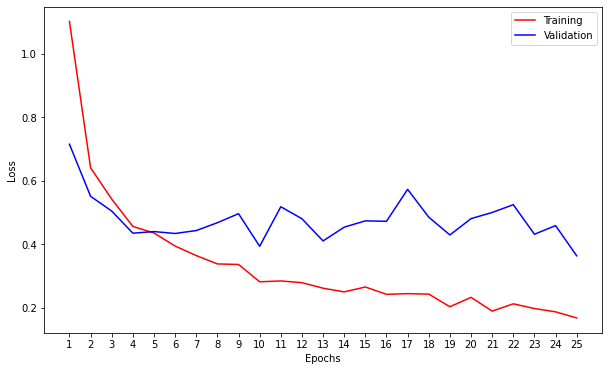

In [ ]:
epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()

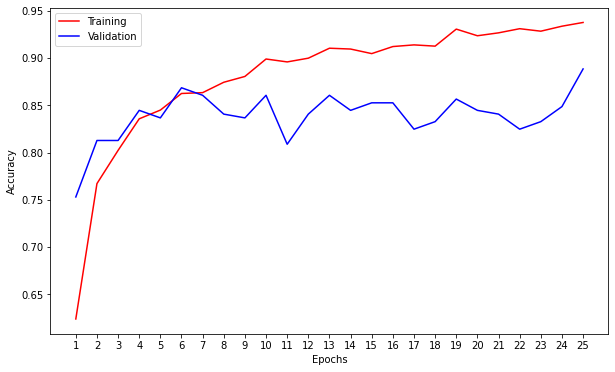

In [ ]:
epochs = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs,accuracy,c="red",label="Training")
plt.plot(epochs,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.legend()

## ResNet
 　　ResNet 구현 및 Keras tuner를 통한 Hyper Parameter 튜닝

### »데이터 구성

In [ ]:
## Import
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

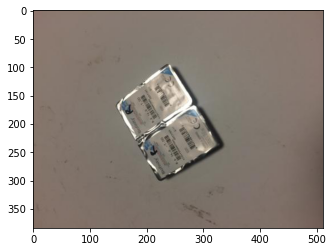

In [ ]:
## 이미지 경로 설정
path = './drive/MyDrive/Garbage classification/Garbage classification'
classes = os.listdir(path)
img_list=glob.glob(os.path.join(path,'*/*.jpg'))
plt.imshow(load_img(img_list[0]))

In [ ]:
## image generator 생성
train_datagen = ImageDataGenerator(rescale=1./255, shear_range = 0.2, zoom_range=0.2, width_shift_range = 0.1, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True, validation_split=0.2)
vaild_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.2)

train_generator=vaild_datagen.flow_from_directory(path, target_size = (224,224), batch_size=16, seed=0, subset='training')
validation_generator = vaild_datagen.flow_from_directory(path, target_size=(224,224), batch_size=16,seed=0, subset='validation')

### »Keras tuner를 사용한 Hyperparameter 조정

*   Keras tuner의 HyperModel인 HyperResNet Class를 사용<br/>

　　　-> HyperResNet Class : ResNet의 버전(v1, v2, ResNext), 합성곱 신경망의 depth(conv3: [4,8], conv4: [6,23,36]), 마지막 pooling layer의 종류<br/>　　　　(avg, max), Optimizer(Adam, SGD, RMSprop), learning rate(0.1, 0.01, 0.001)를 변동 변수로 설정하여 model을 생성해주는 Class

　‣ 기존 learning rate들을 사용하였을때, validation accuracy가 좋지 않아 HyperResNet Class를 overriding 한 Class를 만들어 사용<br/>
　‣ Bayesian Optimization, Hyper Band 사용




In [ ]:
from kerastuner.tuners import Hyperband, BayesianOptimization, RandomSearch
from kerastuner.applications import resnet, HyperResNet
from tensorflow.keras import backend
from tensorflow.keras import layers

from keras_tuner.engine import hypermodel

In [ ]:
##class overriding

class MyHyperResNet(HyperResNet):
    def __init__(
        self,
        include_top=True,
        input_shape=None,
        input_tensor=None,
        classes=None,
        **kwargs
    ):
        super(HyperResNet).__init__(**kwargs)

        self.include_top = include_top
        self.input_shape = input_shape
        self.input_tensor = input_tensor
        self.classes = classes

    def build(self, hp):
        version = hp.Choice("version", ["v1", "v2", "next"], default="v2")
        conv3_depth = hp.Choice("conv3_depth", [4, 8])
        conv4_depth = hp.Choice("conv4_depth", [6, 23, 36])

        # Version-conditional fixed parameters
        preact = True if version == "v2" else False
        use_bias = False if version == "next" else True

        # Model definition.
        bn_axis = 3 if backend.image_data_format() == "channels_last" else 1

        if self.input_tensor is not None:
            inputs = tf.keras.utils.get_source_inputs(self.input_tensor)
            x = self.input_tensor
        else:
            inputs = layers.Input(shape=self.input_shape)
            x = inputs

        # Initial conv2d block.
        x = layers.ZeroPadding2D(padding=((3, 3), (3, 3)), name="conv1_pad")(x)
        x = layers.Conv2D(64, 7, strides=2, use_bias=use_bias, name="conv1_conv")(x)
        if preact is False:
            x = layers.BatchNormalization(
                axis=bn_axis, epsilon=1.001e-5, name="conv1_bn"
            )(x)
            x = layers.Activation("relu", name="conv1_relu")(x)
        x = layers.ZeroPadding2D(padding=((1, 1), (1, 1)), name="pool1_pad")(x)
        x = layers.MaxPooling2D(3, strides=2, name="pool1_pool")(x)

        # Middle hypertunable stack.
        if version == "v1":
            x = resnet.stack1(x, 64, 3, stride1=1, name="conv2")
            x = resnet.stack1(x, 128, conv3_depth, name="conv3")
            x = resnet.stack1(x, 256, conv4_depth, name="conv4")
            x = resnet.stack1(x, 512, 3, name="conv5")
        elif version == "v2":
            x = resnet.stack2(x, 64, 3, name="conv2")
            x = resnet.stack2(x, 128, conv3_depth, name="conv3")
            x = resnet.stack2(x, 256, conv4_depth, name="conv4")
            x = resnet.stack2(x, 512, 3, stride1=1, name="conv5")
        elif version == "next":
            x = resnet.stack3(x, 64, 3, name="conv2")
            x = resnet.stack3(x, 256, conv3_depth, name="conv3")
            x = resnet.stack3(x, 512, conv4_depth, name="conv4")
            x = resnet.stack3(x, 1024, 3, stride1=1, name="conv5")

        # Top of the model.
        if preact is True:
            x = layers.BatchNormalization(
                axis=bn_axis, epsilon=1.001e-5, name="post_bn"
            )(x)
            x = layers.Activation("relu", name="post_relu")(x)

        pooling = hp.Choice("pooling", ["avg", "max"], default="avg")
        if pooling == "avg":
            x = layers.GlobalAveragePooling2D(name="avg_pool")(x)
        elif pooling == "max":
            x = layers.GlobalMaxPooling2D(name="max_pool")(x)

        if self.include_top:
            x = layers.Dense(self.classes, activation="softmax", name="probs")(x)
            model = keras.Model(inputs, x, name="ResNet")
            optimizer_name = hp.Choice(
                "optimizer", ["adam", "rmsprop", "sgd"], default="adam"
            )
            optimizer = keras.optimizers.get(optimizer_name)
            optimizer.learning_rate = hp.Choice(
                "learning_rate", [0.001, 0.0001, 0.00001], default=0.001
            )
            model.compile(
                optimizer=optimizer,
                loss="categorical_crossentropy",
                metrics=["accuracy"],
            )
            return model
        else:
            return keras.Model(inputs, x, name="ResNet")

#### Hyperband keras tuner

In [ ]:
## Hyper Parameter tuning
# Hyperband

hypermodel = MyHyperResNet(input_shape = (224,224,3),classes = 6)
tuner2 = Hyperband(
    hypermodel,
    objective='val_accuracy',
    project_name = 'hyperband',
    max_epochs=15,
    directory = 'archive/hyperband'
)
tuner.search(
            train_hp,
            epochs=15,
            validation_data = validation_hp,
             callbacks=[tf.keras.callbacks.EarlyStopping('val_accuracy', patience=3)])

Trial 30 Complete [00h 08m 54s]
val_accuracy: 0.2644135057926178

Best val_accuracy So Far: 0.5785288214683533
Total elapsed time: 03h 16m 18s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'version': 'v1',
 'conv3_depth': 4,
 'conv4_depth': 6,
 'pooling': 'avg',
 'optimizer': 'adam',
 'learning_rate': 0.0001,
 'tuner/epochs': 15,
 'tuner/initial_epoch': 5,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': 'f7f42051575ba979f26ba2f6d639e3cd'}

In [ ]:
hps_hyper = tuner.get_best_hyperparameters(num_trials = 1)[0]
model_hyper = tuner.hypermodel.build(hps_hyper)
history_hyper = model.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks = tf.keras.callbacks.EarlyStopping('val_loss', patience=3))

Epoch 1/20
127/127 [==============================] - 36s 212ms/step - loss: 1.4919 - acc: 0.4377 - val_loss: 1.2431 - val_acc: 0.5646
Epoch 2/20
127/127 [==============================] - 26s 207ms/step - loss: 0.8047 - acc: 0.7554 - val_loss: 0.9714 - val_acc: 0.6680
Epoch 3/20
127/127 [==============================] - 26s 207ms/step - loss: 0.5120 - acc: 0.8715 - val_loss: 0.8342 - val_acc: 0.7018
Epoch 4/20
127/127 [==============================] - 26s 208ms/step - loss: 0.3424 - acc: 0.9368 - val_loss: 0.7462 - val_acc: 0.7356
Epoch 5/20
127/127 [==============================] - 24s 189ms/step - loss: 0.2398 - acc: 0.9565 - val_loss: 0.7169 - val_acc: 0.7495
Epoch 6/20
127/127 [==============================] - 26s 208ms/step - loss: 0.1714 - acc: 0.9807 - val_loss: 0.7026 - val_acc: 0.7555
Epoch 7/20
127/127 [==============================] - 24s 186ms/step - loss: 0.1309 - acc: 0.9872 - val_loss: 0.6783 - val_acc: 0.7753
Epoch 8/20
127/127 [==============================] - 2

#### Bayesian Optimization keras tuner

In [ ]:
# BayesianOptimization

tuner2 = BayesianOptimization(
    hypermodel,
    objective='val_accuracy',
    max_trials=20
    directory = 'archive/hyperband'
    project_name = 'bayesian'
    )
tuner2.search(
            train_hp,
            epochs=10,
            validation_data = validation_hp,
            callbacks=[EarlyStopping('val_accuracy', patience=3)])

Trial 20 Complete [00h 13m 07s]
val_accuracy: 0.46719682216644287

Best val_accuracy So Far: 0.5029820799827576
Total elapsed time: 04h 18m 42s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner2.get_best_hyperparameters()[0].values

{'version': 'v2',
 'conv3_depth': 8,
 'conv4_depth': 36,
 'pooling': 'max',
 'optimizer': 'sgd',
 'learning_rate': 0.001}

In [ ]:
hps_bay = tuner2.get_best_hyperparameters(num_trials = 1)[0]
model_bay = tuner2.hypermodel.build(hps_bay)
history_bay = model.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks = tf.keras.callbacks.EarlyStopping('val_loss', patience=3))

Epoch 1/20
127/127 [==============================] - 26s 208ms/step - loss: 0.0132 - acc: 0.9980 - val_loss: 0.6557 - val_acc: 0.7873
Epoch 2/20
127/127 [==============================] - 26s 206ms/step - loss: 0.0178 - acc: 0.9980 - val_loss: 0.6727 - val_acc: 0.7893
Epoch 3/20
127/127 [==============================] - 26s 207ms/step - loss: 0.0137 - acc: 0.9995 - val_loss: 0.6818 - val_acc: 0.7893
Epoch 4/20
127/127 [==============================] - 26s 207ms/step - loss: 0.0129 - acc: 0.9995 - val_loss: 0.6874 - val_acc: 0.7893


### »전이학습을 통한 ResNet성능 향상
#### tensonflow(imagenet)

In [ ]:
def model_build(hp):
    resnet = ResNet50V2(weights='imagenet',
                        include_top=False,
                        input_shape = (224,224,3))
    avg = keras.layers.GlobalAveragePooling2D()(resnet.output)
    output = keras.layers.Dense(6, activation="softmax")(avg)
    model = keras.models.Model(inputs=resnet.input, outputs=output)
    optimizer_name = hp.Choice(
        "optimizer", ["adam", "rmsprop", "sgd"], default="adam"
    )
    optimizer = keras.optimizers.get(optimizer_name)
    optimizer.learning_rate = hp.Choice(
        "learning_rate", [0.001, 0.0001, 0.00001], default=0.001
    )
    model.compile(
        optimizer=optimizer,
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

    return model

pretrain_model= myHyperModel
random_tuner = RandomSearch(
    model_build,
    objective='val_accuracy',
    max_trials=9,
    executions_per_trial=1,
    directory='.',
    project_name='pre_random'
    )

random_tuner.search(train_hp, epochs=15,validation_data = validation_hp,callbacks=[tf.keras.callbacks.EarlyStopping('val_accuracy', patience=3)])

Trial 7 Complete [00h 07m 25s]
val_accuracy: 0.6719681620597839

Best val_accuracy So Far: 0.7852882742881775
Total elapsed time: 00h 49m 24s
INFO:tensorflow:Oracle triggered exit


In [ ]:
random_tuner.get_best_hyperparameters()[0]values

{'optimizer': 'rmsprop', 'learning_rate': 1e-05}

In [ ]:
hps_pre = random_tuner.get_best_hyperparameters(num_trials = 1)[0]
model_pre = random_tuner.hypermodel.build(hps_pre)
history_pre = model.fit(train_generator, epochs=20,
                        validation_data=validation_generator,
                        callbacks = tf.keras.callbacks.EarlyStopping('val_loss', patience=3))

Epoch 1/20
127/127 [==============================] - 26s 207ms/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.6860 - val_acc: 0.7853
Epoch 2/20
127/127 [==============================] - 26s 206ms/step - loss: 0.0101 - acc: 0.9990 - val_loss: 0.7104 - val_acc: 0.7813
Epoch 3/20
127/127 [==============================] - 26s 207ms/step - loss: 0.0108 - acc: 0.9985 - val_loss: 0.7130 - val_acc: 0.7833
Epoch 4/20
127/127 [==============================] - 27s 209ms/step - loss: 0.0068 - acc: 0.9995 - val_loss: 0.7253 - val_acc: 0.7813


#### Pytorch

In [ ]:
import os
import torch
from torch.utils.data import random_split
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from tqdm import tqdm
import time

In [ ]:
## make dataset
data_dir = 'archive/Garbage classification/Garbage classification'
classes = os.listdir(data_dir)
transformations = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])
dataset = ImageFolder(data_dir, transform = transformations)
torch.manual_seed(21)
train_ds, val_ds, test_ds = random_split(dataset, [1820, 202, 505])
len(train_ds), len(val_ds), len(test_ds)

(1820, 202, 505)

In [ ]:
from torch.utils.data.dataloader import DataLoader
batch_size = 32
train_dl = DataLoader(train_ds, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers = 4, pin_memory = True)

## model

class ResNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet50(pretrained=True)
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, len(dataset.classes))

    def forward(self, xb):
        return torch.sigmoid(self.network(xb))

model = ResNet()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
criterion = F.cross_entropy
for epoch in range(10):
    # Training Phase
    model.train()
    train_losses = []
    val_losses = []
    t_correct = 0
    t_total = 0
    v_correct = 0
    v_total = 0
    for img, label in tqdm(train_dl, desc = f'epoch: {epoch+1}'):
        img, label = img.to(device), label.to(device)
        optimizer.zero_grad()
        output = model(img)
        loss = criterion(output, label)
        train_losses.append(loss)
        _, predicted = torch.max(output, 1)
        t_total += label.size(0)
        t_correct += (predicted == label).sum()
        loss.backward()
        optimizer.step()

    # Validation phase
    with torch.no_grad():
        model.eval()
        for img, label in val_dl:
            img, label = img.to(device), label.to(device)
            output = model(img)
            loss = criterion(output,label)
            val_losses.append(loss)
            _, predicted = torch.max(output, 1)
            v_total += label.size(0)
            v_correct += (predicted == label).sum()


    train_loss = torch.stack(train_losses).mean().item()
    train_acc = t_correct / float(t_total)
    val_loss = torch.stack(val_losses).mean().item()
    val_acc = v_correct / float(v_total)
    print(f'train_loss : {train_loss:.4f}, train_acc = {train_acc:.4f}, val_loss = {val_loss:.4f}, val_acc:{val_acc:.4f}')
    time.sleep(1)

epoch: 1: 100%|██████████| 57/57 [00:30<00:00,  1.86it/s]


train_loss : 1.6973, train_acc = 0.5170, val_loss = 1.5955, val_acc:0.7673


epoch: 2: 100%|██████████| 57/57 [00:30<00:00,  1.86it/s]


train_loss : 1.5032, train_acc = 0.7929, val_loss = 1.4472, val_acc:0.8465


epoch: 3: 100%|██████████| 57/57 [00:30<00:00,  1.86it/s]


train_loss : 1.3734, train_acc = 0.8527, val_loss = 1.3491, val_acc:0.8564


epoch: 4: 100%|██████████| 57/57 [00:31<00:00,  1.82it/s]


train_loss : 1.2848, train_acc = 0.8901, val_loss = 1.2773, val_acc:0.8713


epoch: 5: 100%|██████████| 57/57 [00:30<00:00,  1.86it/s]


train_loss : 1.2173, train_acc = 0.9280, val_loss = 1.2280, val_acc:0.9059


epoch: 6: 100%|██████████| 57/57 [00:30<00:00,  1.85it/s]


train_loss : 1.1673, train_acc = 0.9626, val_loss = 1.1922, val_acc:0.9208


epoch: 7: 100%|██████████| 57/57 [00:30<00:00,  1.85it/s]


train_loss : 1.1345, train_acc = 0.9775, val_loss = 1.1735, val_acc:0.8960


epoch: 8: 100%|██████████| 57/57 [00:31<00:00,  1.82it/s]


train_loss : 1.1122, train_acc = 0.9813, val_loss = 1.1574, val_acc:0.9257


epoch: 9: 100%|██████████| 57/57 [00:31<00:00,  1.82it/s]


train_loss : 1.0970, train_acc = 0.9934, val_loss = 1.1488, val_acc:0.9307


epoch: 10: 100%|██████████| 57/57 [00:30<00:00,  1.85it/s]


train_loss : 1.0872, train_acc = 0.9956, val_loss = 1.1403, val_acc:0.9307


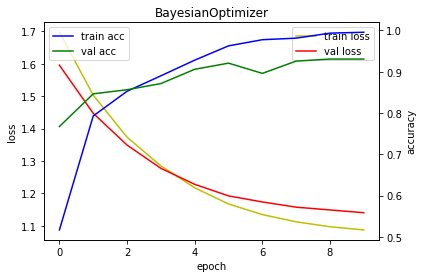

In [ ]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(train_loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')

acc_ax.plot(train_acc, 'b', label='train acc')
acc_ax.plot(val_acc, 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')
plt.title('BayesianOptimizer')

plt.show()

### »평가지표 산정

ResNet Accuracy : 0.9307(model: pretrained ResNet50_pytorch)

--------


# **¶　프로젝트 결과 및 기대효과**

## »결과
*   모델 성능<br/>
　　KNN, MLP, CNN, VGG16, ResNet<br/>

|    Model    |    Acc       |   Model     |    Acc    |
|:------------:|:-----------:|:----------:|:---------:|
|         KNN  |   0.4812    | MLP        |   0.4881   |
|CNN           |   0.8817    | VGG16      |  0.8884    |
|              |    ResNet   |  0.9307   |            |

<br/>
-5가지 모델의 분류 성능을 비교해본 결과 ResNet이 0.9307로 가장 높음<br/><br/>
- VGG16, ResNet 모델의 경우 전이학습을 진행하여 데이터 수의 부족을 보완하고자 하였으며, 실제로 전이학습을 진행한 두 모델의 성능이 타 모델에 비해 높은 값을 보임<br/><br/>
- CNN 모델의 경우 모델 최적화를 위해 데이터 확장, class 가중치 산정의 방법을 적용하였으며, 그 결과 전이학습을 진행한 VGG16과 유사한 정도의 높은 성능을 보임<br/><br/>
-KNN과 MLP의 경우 성능이 유사하였는데, 교차검증을 통해 최적의 k를 찾는 과정이 KNN의 성능 향상에 긍정적인 영향을 미침<br/><br/>
-MLP의 경우 이미지 데이터의 색 표현 방식을 NB로 비교하여 정확도가 높은 방법을 채택. MLP모델은 layer의 구성에 따라 모델 성능의 변화가 크기 때문에 Random search를 통한 Hyperparameter 조정을 진행하였으나 향상된 성능을 보이지 못함<br/>
<br/><br/>



## »결론 및 기대효과
쓰레기 이미지 데이터 분류에 있어서 심층 신경망 학습을 통해 이미지, 자연어 처리에 주로 이용되는 CNN의 성능이 높다. CNN구조에 변화를 준 VGG16과  ResNet은 더 향상된 성능을 보였고 전이학습을 통해 데이터 수 부족의 한계를 해결하여 보다 정확한 이미지 분류가 이루어졌다.<br/>
따라서 전이학습 된 ResNet이 09307의 높은 정확도를 가진 적용 가능한 모델이다.<br/><br/>



기대효과<br/>
i.	쓰레기 수거장의 분류모델<br/>
　-쓰레기 이미지의 분류 알고리즘에 의한 재활용 효율 향상 및 소요시간 절감으로 경제적, 사회적 문제 해결<br/><br/>
ii.	분류알고리즘 어플 제작<br/>
　-사진 이미지를 통한 쓰레기 분류 어플 보급으로 시민들의 정확한 쓰레기 분리배출 의사결정에 긍정적 영향 <br/>
　-분리배출 교육을 위한 목적으로 사용 가능<br/>



### » 보완할 점

- MLP 모델에서 Hyperparameter 조정 후 모델의 성능이 이전보다 낮음.<br/>
적절한 매개변수 범위 설정 필요
- ResNet의 FC layer에 따라 성능차이를 보여 추후 보완이 필요함
